Detected color at (300, 150) → SkyBlue | R=40 G=162 B=233


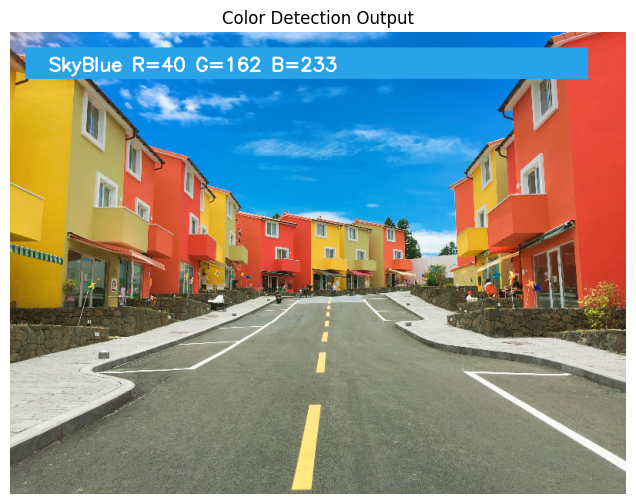

In [3]:
import cv2
import pandas as pd
from IPython.display import display, Image
from matplotlib import pyplot as plt
img_path = r'C:\Users\DELL\Downloads\pic2 (1).jpg' 
img = cv2.imread(img_path)
img = cv2.resize(img, (800, 600))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
csv_path = r'C:\Users\DELL\Documents\colors.csv'  
columns = ['color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv(csv_path)
def get_color_name(R, G, B):
    minimum = float('inf')
    cname = ""
    for i in range(len(df)):
        d = abs(R - int(df.loc[i, "R"])) + abs(G - int(df.loc[i, "G"])) + abs(B - int(df.loc[i, "B"]))
        if d < minimum:
            minimum = d
            cname = df.loc[i, "color_name"]
    return cname
def detect_color(x, y):
    b, g, r = img[y, x]
    r, g, b = int(r), int(g), int(b)
    color_name = get_color_name(r, g, b)
    print(f"Detected color at ({x}, {y}) → {color_name} | R={r} G={g} B={b}")
    img_copy = img_rgb.copy()
    cv2.rectangle(img_copy, (20, 20), (750, 60), (r, g, b), -1)
    text = f"{color_name} R={r} G={g} B={b}"
    cv2.putText(img_copy, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                (255, 255, 255) if r + g + b < 600 else (0, 0, 0), 2)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(img_copy)
    plt.axis('off')
    plt.title("Color Detection Output")
    plt.show()
detect_color(300, 150)